<a href="https://colab.research.google.com/github/ninaverzun/Deep_Learning_22961/blob/main/Copy_of_Nina_HaterReentryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verify GPU availability
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Feb 24 16:09:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.41                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8              1W /  135W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Sure! Below is a Google Colab notebook code that includes the necessary installations, CSV loading, and the training code for the BERT-based classifier.

# ```python
# Install necessary libraries
# Install necessary libraries
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, TrainerCallback
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
from google.colab import files
# uploaded = files.upload()


In [ ]:
import requests
import io
import pandas as pd

csv_file_url='https://drive.google.com/file/d/1NXak65zH58IOi_cOFYoHDB1a9f3Rx6qz/view?usp=drive_link'

# Extract the file ID from the URL
file_id = csv_file_url.split('/')[-2]

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Download the file using requests
response = requests.get(download_url)
response.raise_for_status()  # Raise an exception for bad responses

# Load the file content into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

# Now you can use the DataFrame 'df' as before

In [ ]:
# import pandas as pd

# # Path to your file in Google Drive
# # file_path = 'https://drive.google.com/file/d/1NXak65zH58IOi_cOFYoHDB1a9f3Rx6qz/view?usp=drive_link'

# file_path = '/content/drive/My Drive/CounterspeechProject/hater_reentry_dataset.csv'

# # Assuming the uploaded file is named 'data.csv'
# df = pd.read_csv(file_path)


In [ ]:

# Inspect the DataFrame
print(df.head())
print(df.columns)

df.head()

# Verify the DataFrame index
print(df.index)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Inspect the DataFrame again
print(df.head())
print(df.index)


   index  grandID parentID          grandAuthor          parentAuthor  \
0      0  gzggf5w  gzghi8r       Anubisrising89         Zombieattackr   
1      1  gzkuqhr  gzl4ccm       Anubisrising89  psychedelic_hypnosis   
2      2  h0k6pu1  h0orb44  Soy_based_socialism         Bull_Winkle69   
3      3  gotpjyl  gotwcvk       Anubisrising89     BruceJennersPen15   
4      4  gotpjyl  gou1yhg       Anubisrising89               Cityman   

             sonAuthor    gandTime  parentTime  grandScore  parentScore  \
0       Anubisrising89  1621989035  1621989585           3            2   
1       Anubisrising89  1622073736  1622078483           1            1   
2  Soy_based_socialism  1622810237  1622902133           3            1   
3       Anubisrising89  1614344871  1614348672           0            1   
4       Anubisrising89  1614344871  1614351391           0            2   

                                        grandContent  \
0                        How about fuck neither one.  

In [ ]:
# Extract the relevant columns for training
# df = df[['parentContent', '3_category']].copy()  # Use .copy() to create a copy of the slice
df['combinedContent'] = df['parentContent'] + ' ' + df['grandContent']

df.head()
# Inspect the DataFrame
print(df.head())
print(df.columns)

# Verify the DataFrame index
print(df.index)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Inspect the DataFrame again
print(df.head())
print(df.index)

print(df['3_category'].dtype)

   index  grandID parentID          grandAuthor          parentAuthor  \
0      0  gzggf5w  gzghi8r       Anubisrising89         Zombieattackr   
1      1  gzkuqhr  gzl4ccm       Anubisrising89  psychedelic_hypnosis   
2      2  h0k6pu1  h0orb44  Soy_based_socialism         Bull_Winkle69   
3      3  gotpjyl  gotwcvk       Anubisrising89     BruceJennersPen15   
4      4  gotpjyl  gou1yhg       Anubisrising89               Cityman   

             sonAuthor    gandTime  parentTime  grandScore  parentScore  \
0       Anubisrising89  1621989035  1621989585           3            2   
1       Anubisrising89  1622073736  1622078483           1            1   
2  Soy_based_socialism  1622810237  1622902133           3            1   
3       Anubisrising89  1614344871  1614348672           0            1   
4       Anubisrising89  1614344871  1614351391           0            2   

                                        grandContent  \
0                        How about fuck neither one.  

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Replace non-finite values with the mode of the column
df['3_category'] = df['3_category'].replace([float('inf'), float('-inf')], pd.NA)
df['3_category'].fillna(df['3_category'].mode()[0], inplace=True)

# Convert the '3_category' column to integers
df['3_category'] = df['3_category'].astype(int)

print(df['3_category'].dtype)

index              0
grandID            0
parentID           0
grandAuthor        0
parentAuthor       0
sonAuthor          0
gandTime           0
parentTime         0
grandScore         0
parentScore        0
grandContent       0
parentContent      0
grandSubmission    0
3_category         0
combinedContent    0
dtype: int64
int64


<ipython-input-43-7a57c2a36499>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['3_category'].fillna(df['3_category'].mode()[0], inplace=True)


In [ ]:
# Map the categories to integers
category_mapping = {0: 0, 1: 1, 2: 2}
print(df['3_category'].dtype)

df['3_category'] = df['3_category'].map(category_mapping)

print(df['3_category'].dtype)

int64
int64


In [ ]:
use_saved_split=False

In [ ]:
if use_saved_split:
  train_df = pd.read_csv('train.csv')  # Assuming train.csv is in the same directory as your notebook
  test_df = pd.read_csv('test.csv')
  val_df = pd.read_csv('val.csv')
else:
  # Split the data into training, validation, and testing sets
  train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['combinedContent'], df['3_category'], test_size=0.3)
  val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5)
  # Save the training, validation, and testing data to CSV files
  train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
  val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
  test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

  train_df.to_csv('train.csv', index=False)
  val_df.to_csv('val.csv', index=False)
  test_df.to_csv('test.csv', index=False)

In [ ]:
load_saved_model=False

In [ ]:
    # output_base_dir='/content/drive/My Drive/CounterspeechProject/HaterReentryModels/results'
    results_dir='./results'
    output_base_dir='./results'
    num_epochs = 10


In [ ]:


# Load the BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
output_dir = f"./results_retrain/epoch_50"

if load_saved_model:
  # Load the model later
  # Example: Load the model from epoch 1
  loaded_model = RobertaForSequenceClassification.from_pretrained(output_dir)
  loaded_tokenizer = RobertaTokenizer.from_pretrained(output_dir)
  # Use the loaded model and tokenizer for inference or further training
else:
  # Load the RoBERTa tokenizer
  loaded_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer = loaded_tokenizer

# Tokenize the data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [ ]:
# Inspect the encodings
print(train_encodings.keys())
print(val_encodings.keys())
print(test_encodings.keys())

print(len(train_labels))
print(len(test_labels))
print(len(val_labels))
print(df.index)


dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])
19558
4192
4191
RangeIndex(start=0, stop=27941, step=1)


In [ ]:
# Convert the data into torch datasets
class CounterSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.reset_index(drop=True) # Reset the index of labels to avoid KeyError

    def __getitem__(self, idx):
         # Check if the index is within the bounds
        if idx >= len(self.labels):
            raise IndexError(f"Index {idx} is out of range for dataset of length {len(self.labels)}")
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the datasets with the updated class
train_dataset = CounterSpeechDataset(train_encodings, train_labels)
val_dataset = CounterSpeechDataset(val_encodings, val_labels)
test_dataset = CounterSpeechDataset(test_encodings, test_labels)


# Verify the lengths of the datasets
print(f"Training dataset length: {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")
print(f"Testing dataset length: {len(test_dataset)}")


Training dataset length: 19558
Validation dataset length: 4191
Testing dataset length: 4192


In [ ]:
# Load the BERT model for sequence classification
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Freeze all BERT layers
# for param in model.bert.parameters():
#     param.requires_grad = False


In [ ]:
# Load the RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Freeze all RoBERTa layers
for param in model.roberta.parameters():
    param.requires_grad = False


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir=results_dir,
    num_train_epochs=num_epochs,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",  # Save the model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    report_to=[]  # Disable W&B logging
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# # Create a custom callback to log training and validation losses and save the model
# class LossLoggerCallback(TrainerCallback):
#     def __init__(self, trainer):
#         self.trainer = trainer

#     def on_epoch_end(self, args, state, control, **kwargs):
#         print(f"Epoch {state.epoch}:")
#         # Safely access the training and evaluation loss
#         train_loss = state.log_history[-2].get('loss', 'N/A')
#         eval_loss = state.log_history[-1].get('eval_loss', 'N/A')
#         print(f"  Training Loss: {train_loss}")
#         print(f"  Validation Loss: {eval_loss}")
#         # Save the model at the end of each epoch
#         output_dir = f"{output_base_dir}/epoch_{int(state.epoch)}"
#         self.trainer.model.save_pretrained(output_dir)
#         self.trainer.tokenizer.save_pretrained(output_dir)

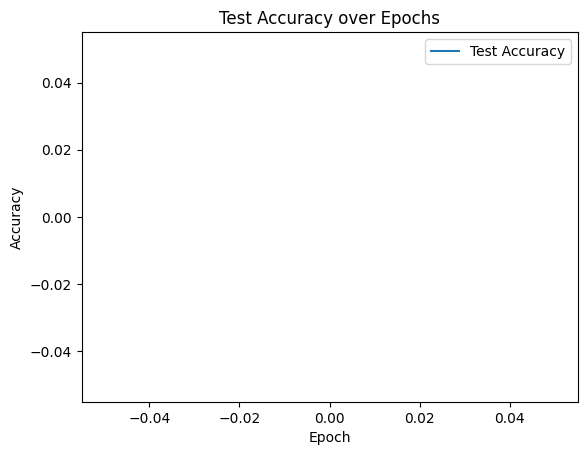

In [ ]:

from sklearn.metrics import accuracy_score  # Add this line
import matplotlib.pyplot as plt

# Enable interactive mode
plt.ion()

# Create the figure and axes once
fig, ax = plt.subplots()
line, = ax.plot([], [], label='Test Accuracy')  # Create an empty line object
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy over Epochs')
ax.legend()

# Create a custom callback to log training and validation losses
class LossLoggerCallback(TrainerCallback):
    def __init__(self, trainer, fig, line, ax):
        self.trainer = trainer
        self.train_losses = [] # Store training losses
        self.eval_losses = [] # Store validation losses
        self.test_accuracies = [] # Store test accuracies
        self.fig, self.ax = fig, ax # you need to define fig and ax here
        self.line = line

    def on_epoch_end(self, args, state, control, **kwargs):
        # Log training and validation loss
        train_loss = state.log_history[-2].get('loss', 'N/A')
        eval_loss = state.log_history[-1].get('eval_loss', 'N/A')
        self.train_losses.append(train_loss)
        self.eval_losses.append(eval_loss)
        print(f"  Training Loss: {train_loss}")
        print(f"  Validation Loss: {eval_loss}")
        # Save the model at the end of each epoch
        output_dir = f"{output_base_dir}/epoch_{int(state.epoch)}"
        self.trainer.model.save_pretrained(output_dir)
      #  self.trainer.tokenizer.save_pretrained(output_dir)
        self.trainer.processing_class.save_pretrained(output_dir)

        # # Visualize losses using matplotlib
        # plt.plot(self.train_losses, label='Training Loss')
        # plt.plot(self.eval_losses, label='Validation Loss')
        # plt.xlabel('Epoch')
        # plt.ylabel('Loss')
        # plt.legend()
        # plt.show()
        # Evaluate on test set and store accuracy
        test_predictions = self.trainer.predict(test_dataset)
        test_preds = test_predictions.predictions.argmax(-1)
        test_accuracy = accuracy_score(test_labels, test_preds) # Assuming you have accuracy_score imported
        self.test_accuracies.append(test_accuracy)
        print(f"  Test Accuracy: {test_accuracy}")

        # Update the plot data
        self.line.set_data(range(1, len(self.test_accuracies) + 1), self.test_accuracies)
        # Adjust the plot limits if necessary
        self.ax.relim()
        self.ax.autoscale_view()
        # Redraw the plot
        self.fig.canvas.draw_idle()
        self.fig.canvas.flush_events()

    def plot_test_accuracy(self):
      plt.plot(self.test_accuracies, label='Test Accuracy')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.title('Test Accuracy over Epochs')
      plt.show()

#  # Add the callback to the Trainer
#  trainer.add_callback(LossLoggerCallback(trainer))

In [ ]:

# Create the Trainer instance with EarlyStoppingCallback and LossLoggerCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Pass the validation dataset
    # callbacks=[LossLoggerCallback(trainer)],  # Add loss logging
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=3), LossLoggerCallback()]  # Add early stopping and loss logging
    tokenizer=tokenizer  # Pass the tokenizer to the Trainer
)

# Instantiate LossLoggerCallback after Trainer is created
# loss_logger_callback = LossLoggerCallback(trainer)

# Create an instance of the callback, passing the figure and line objects
loss_logger_callback = LossLoggerCallback(trainer, fig, line, ax)
trainer.add_callback(loss_logger_callback)

# Add the callback to the Trainer
trainer.add_callback(loss_logger_callback)

<ipython-input-28-b70da8473682>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
You are adding a <class '__main__.LossLoggerCallback'> to the callbacks of this Trainer, but there is already one. The currentlist of callbacks is
:DefaultFlowCallback
NotebookProgressCallback
LossLoggerCallback


In [ ]:

# # Create the Trainer instance with EarlyStoppingCallback and LossLoggerCallback
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,  # Pass the validation dataset
#     callbacks=[LossLoggerCallback(trainer)],  # Add loss logging
#     # callbacks=[EarlyStoppingCallback(early_stopping_patience=3), LossLoggerCallback()]  # Add early stopping and loss logging
#     tokenizer=tokenizer  # Pass the tokenizer to the Trainer
# )


In [ ]:

# Train the model
try:
    trainer.train()
except Exception as e:
    print(f"Error during training: {e}")

Epoch,Training Loss,Validation Loss
1,1.009600,1.015682
2,1.034700,1.005193
3,0.997200,0.995006
4,0.958300,0.991166
5,1.016800,0.990835
6,0.928400,0.991466
7,1.021600,0.988307
8,1.060600,0.986895
9,0.951200,0.987701
10,1.004500,0.986984


  Training Loss: 0.9308
  Validation Loss: N/A
  Test Accuracy: 0.48377862595419846
  Training Loss: 0.9308
  Validation Loss: N/A
  Test Accuracy: 0.48377862595419846
  Training Loss: 1.0487
  Validation Loss: N/A
  Test Accuracy: 0.48974236641221375
  Training Loss: 1.0487
  Validation Loss: N/A
  Test Accuracy: 0.48974236641221375
  Training Loss: 1.1008
  Validation Loss: N/A
  Test Accuracy: 0.5014312977099237
  Training Loss: 1.1008
  Validation Loss: N/A
  Test Accuracy: 0.5014312977099237
  Training Loss: 0.9997
  Validation Loss: N/A
  Test Accuracy: 0.5004770992366412
  Training Loss: 0.9997
  Validation Loss: N/A
  Test Accuracy: 0.5004770992366412
  Training Loss: 0.9946
  Validation Loss: N/A
  Test Accuracy: 0.5054866412213741
  Training Loss: 0.9946
  Validation Loss: N/A
  Test Accuracy: 0.5054866412213741
  Training Loss: 0.9282
  Validation Loss: N/A
  Test Accuracy: 0.4978530534351145
  Training Loss: 0.9282
  Validation Loss: N/A
  Test Accuracy: 0.4978530534351145


# New Section

In [ ]:
# Evaluate the model
# predictions = trainer.predict(test_dataset)
# preds = predictions.predictions.argmax(-1)
# print(classification_report(test_labels, preds))

# Evaluate the model on the validation dataset
val_predictions = trainer.predict(val_dataset)
val_preds = val_predictions.predictions.argmax(-1)

# Evaluate the model on the test dataset
test_predictions = trainer.predict(test_dataset)
test_preds = test_predictions.predictions.argmax(-1)

print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64      2023
           1       0.61      0.02      0.03       893
           2       0.52      0.26      0.34      1276

    accuracy                           0.51      4192
   macro avg       0.54      0.38      0.34      4192
weighted avg       0.53      0.51      0.42      4192



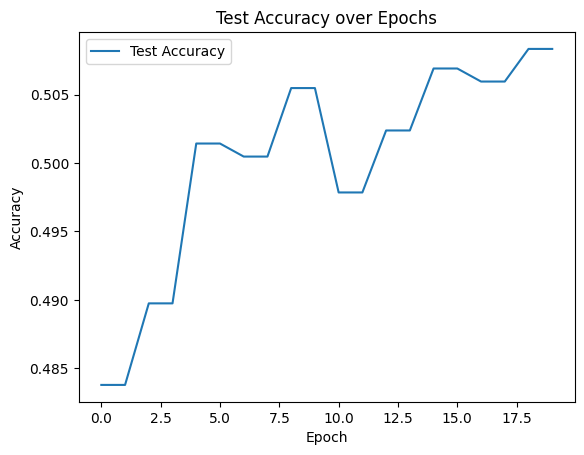

In [ ]:
# After training is complete
loss_logger_callback.plot_test_accuracy()

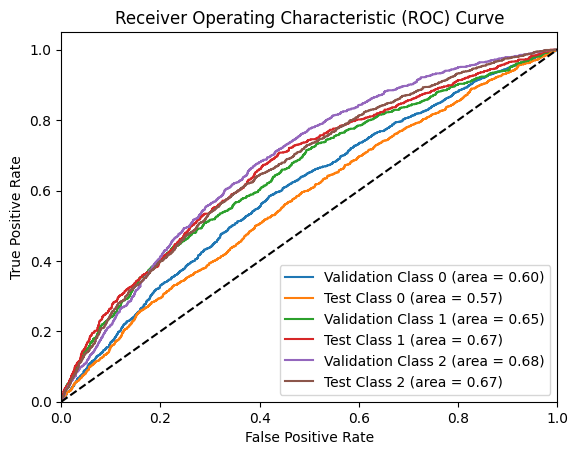

In [ ]:
# Compute ROC curve and ROC area for each class for validation and test datasets
fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(3):
    fpr_val[i], tpr_val[i], _ = roc_curve(val_labels, val_predictions.predictions[:, i], pos_label=i)
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])
    fpr_test[i], tpr_test[i], _ = roc_curve(test_labels, test_predictions.predictions[:, i], pos_label=i)
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC curve
plt.figure()
for i in range(3):
    plt.plot(fpr_val[i], tpr_val[i], label=f'Validation Class {i} (area = {roc_auc_val[i]:.2f})')
    plt.plot(fpr_test[i], tpr_test[i], label=f'Test Class {i} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# !zip -r results_retrain_epoch10.zip results_retrain/epoch_10

In [ ]:
# files.download('results_retrain.zip')